# Breast Cancer synthetic data
## Part 1. Exploratory Data Analysis

#### by Grzegorz Furdyn

## Contents

#### CRISP-DM Phase 1: Business Understanding
* [Business understanding](#busund)

#### CRISP-DM Phase 2: Data Understanding
* [Inital data collection](#coll)
* [Data description](#descr)
* [Definition of auxiliary Y features](#surv)
* [Definition of auxiliary X features](#aux)
* [Data exploration](#expl)
    * [Age, vital status and time since incident](#age)
    * [Numeric features](#num)
    * [Categorical features](#cat)
    * [Other correlations](#other)


## CRISP-DM Phase 1: Business Understanding

For general understanding of the topic these sources are useful:

https://richtlijnendatabase.nl/richtlijn/borstkanker/algemeen.html

https://www.rivm.nl/documenten/landelijke-evaluatie-bevolkingsonderzoek-borstkanker-in-nederland-letb-xiv-2019





## CRISP-DM Phase 2: Data Understanding

<a id='coll'></a>
### Initial data collection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)

In [2]:
df_orig = pd.read_csv('NKR_IKNL_breast_syntheticdata.csv', delimiter=';')

In [3]:
df_orig.shape

(60000, 46)

For the start I will work with a subset of the data, i.e. the cohort of incjr 2010, and remove unnecessary variables

In [4]:
df = df_orig[df_orig['incjr'] == 2010].copy()

In [5]:
df = df[df['gesl'] == 2]

I remove columns which are not relevant, i.e. take either unique or the same values for each record 

In [6]:
df = df.drop(columns = ['key_nkr', 'key_eid', 'topo', 'incjr', 'gesl'], axis = 1)

<a id='descr'></a>
### Data description

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5241 entries, 1 to 59974
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   leeft              5241 non-null   int64  
 1   vit_stat           5241 non-null   int64  
 2   vit_stat_int       5241 non-null   int64  
 3   tumsoort           5241 non-null   int64  
 4   diag_basis         5241 non-null   int64  
 5   topo_sublok        5241 non-null   object 
 6   later              5125 non-null   float64
 7   morf               5241 non-null   int64  
 8   gedrag             5241 non-null   int64  
 9   diffgrad           5241 non-null   int64  
 10  ct                 5173 non-null   object 
 11  cn                 5172 non-null   object 
 12  cm                 5010 non-null   float64
 13  pt                 4722 non-null   object 
 14  pn                 4546 non-null   object 
 15  pm                 471 non-null    float64
 16  stadium            5205

In [8]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
leeft,5241.0,NaN,NaN,NaN,63.037397,13.689291,18.0,54.0,63.0,72.0,104.0
vit_stat,5241.0,NaN,NaN,NaN,0.348407,0.476511,0.0,0.0,0.0,1.0,1.0
vit_stat_int,5241.0,NaN,NaN,NaN,2932.030147,977.262781,4.0,2200.0,3326.0,3636.0,4048.0
tumsoort,5241.0,NaN,NaN,NaN,501439.381797,366.495576,501300.0,501300.0,501300.0,501300.0,503200.0
diag_basis,5241.0,NaN,NaN,NaN,6.718756,1.076948,2.0,7.0,7.0,7.0,7.0
topo_sublok,5241,9,C504,1816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
later,5125.0,NaN,NaN,NaN,1.51161,0.499914,1.0,1.0,2.0,2.0,2.0
morf,5241.0,NaN,NaN,NaN,8497.978058,86.814691,8000.0,8500.0,8500.0,8500.0,8983.0
gedrag,5241.0,NaN,NaN,NaN,2.875215,0.330507,2.0,3.0,3.0,3.0,3.0
diffgrad,5241.0,NaN,NaN,NaN,3.112192,2.596167,1.0,2.0,2.0,3.0,9.0


In [9]:
df.columns

Index(['leeft', 'vit_stat', 'vit_stat_int', 'tumsoort', 'diag_basis',
       'topo_sublok', 'later', 'morf', 'gedrag', 'diffgrad', 'ct', 'cn', 'cm',
       'pt', 'pn', 'pm', 'stadium', 'cstadium', 'pstadium', 'ond_lymf',
       'pos_lymf', 'er_stat', 'pr_stat', 'her2_stat', 'dcis_comp', 'multifoc',
       'tum_afm', 'swk', 'swk_uitslag', 'mari', 'mari_uitslag', 'okd',
       'org_chir', 'uitgebr_chir_code', 'dir_reconstr', 'chemo', 'target',
       'horm', 'rt', 'meta_rt', 'meta_chir'],
      dtype='object')

Based on the NKR_IKNL_breast_datadictionary.xlsx file, features are classified either as categorical or numeric.

In [10]:
categorical_features = [ 'tumsoort',
                         'diag_basis',
                         'topo_sublok',
                         'later',
                         'morf',
                         'gedrag',
                         'ct',
                         'cn',
                         'cm',
                         'pt',
                         'pn',
                         'pm',
                         'stadium',
                         'cstadium', 
                         'pstadium',
                         'er_stat',
                         'pr_stat',
                         'her2_stat',
                         'dcis_comp',
                         'multifoc',
                         'swk',
                         'swk_uitslag',
                         'mari',
                         'mari_uitslag',
                         'okd',
                         'org_chir',
                         'uitgebr_chir_code',
                         'dir_reconstr',
                         'chemo',
                         'target',
                         'horm',
                         'rt',
                         'meta_rt',
                         'meta_chir']

In [11]:
numeric_features = ['leeft',
                     'diffgrad',
                     'ond_lymf',
                     'pos_lymf',
                     'tum_afm']

Identify missing values

In [12]:
df.isna().sum()[df.isna().sum() != 0].sort_values(ascending = False)

mari                 5070
mari_uitslag         4942
pm                   4770
swk_uitslag          1487
dcis_comp            1196
tum_afm              1166
pn                    695
er_stat               550
her2_stat             543
pr_stat               524
pt                    519
pstadium              484
uitgebr_chir_code     478
pos_lymf              405
cm                    231
later                 116
multifoc               93
cstadium               82
cn                     69
ct                     68
stadium                36
ond_lymf               26
dtype: int64

For categorical features, we shall simply replace nan with text "unknown"

In [13]:
df[categorical_features] = df[categorical_features].fillna('unknown')

In [14]:
df[categorical_features] = df[categorical_features].astype('str')

<a id='surv'></a>
### Creation of derived Y features

As seen above, for vit_stat = 0 (alive), the vit_stat_int belongs to one of two sharply defined ranges. Let's identify precisely the limits of these ranges. I will calculate parameters T1 and T2 as beginning and end of the first range, and T3 and T4 respectively of the second range.

In [15]:
df_alive = df[df['vit_stat'] == 0]   # dataset slice including only patients alive i.e. vit_stat = 0 

<AxesSubplot:xlabel='vit_stat_int'>

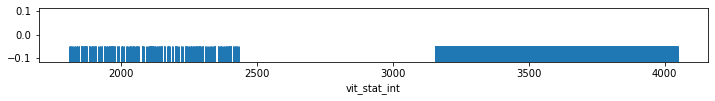

In [16]:
plt.figure(figsize = (12,1))
sns.rugplot(data = df_alive, x = 'vit_stat_int', height = 0.3)

In [17]:
df_alive1 = df_alive[df_alive['vit_stat_int'] < 2500]  # first range

In [18]:
df_alive2 = df_alive[df_alive['vit_stat_int'] > 2500]  # second range

In [19]:
T1 = df_alive1['vit_stat_int'].min()
T2 = df_alive1['vit_stat_int'].max()
T3 = df_alive2['vit_stat_int'].min()
T4 = df_alive2['vit_stat_int'].max()
T1, T2, T3, T4

(1807, 2431, 3155, 4048)

For the purpose of further analysis and modeling, I will define three new features:
- survival_5Y - vital status at point T1 (1807 days, i.e. approx 5 years) after cancer detection. Survival_5Y equals 1 if  a patient is alive, or 0 if deceased. The mean value of survival_5Y is practically equivalent to five-year survival rate, a commonly used metric. 
- years_after_diagnosis - number of full years (until 5) for which the patient stayed alive after diagnosis. This variable will be used to explore correlations between clinical features and patient's survival
- exp_life - Expected life duration after cancer detection. This variable will be equal to vit_stat_int for vit_stat = 0, i.e. actual duration of life of patients who died. For patients alive (i.e. vit_stat = 0) this parameter will not be determined

In [20]:
def survival_5Y(row):
    if row['vit_stat_int'] < T1:
        return 0
    else:
        return 1

In [21]:
df['survival_5Y'] = df.apply(survival_5Y, axis = 1)

In [22]:
def years_after_diagnosis(row):
    if row['vit_stat_int'] < 365:
        return 0
    elif row['vit_stat_int'] < 730:
        return 1
    elif row['vit_stat_int'] < 1095:
        return 2
    elif row['vit_stat_int'] < 1460:
        return 3
    elif row['vit_stat_int'] < T1:
        return 4
    elif row['vit_stat_int'] < 2190:
        return 5
    else:
        return np.nan

In [23]:
df['years_after_diagnosis'] = df.apply(years_after_diagnosis, axis = 1)

In [24]:
import math
def expectedLife(row):
    if row['vit_stat'] == 0:
        return np.nan
    else:
        return math.floor(row['vit_stat_int'] / 365)

In [25]:
#df['exp_life'] = df.apply(expectedLife, axis = 1)

In [26]:
df.head()

,leeft,vit_stat,vit_stat_int,tumsoort,diag_basis,topo_sublok,later,morf,gedrag,diffgrad,...,uitgebr_chir_code,dir_reconstr,chemo,target,horm,rt,meta_rt,meta_chir,survival_5Y,years_after_diagnosis
1,60,0,3592,503200,2,C505,1.0,8520,2,2,...,131C50,1,1.0,0.0,2.0,2.0,0.0,0.0,1,NaN
2,43,0,4011,502200,7,C508,2.0,8500,2,1,...,unknown,0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
8,61,0,4004,501300,7,C504,1.0,8500,3,9,...,131C50,0,1.0,3.0,2.0,2.0,0.0,0.0,1,NaN
14,76,1,1466,501300,2,C504,2.0,8500,3,2,...,unknown,0,0.0,0.0,4.0,0.0,0.0,0.0,0,4.0
20,60,1,2865,501300,7,C502,1.0,8500,3,2,...,132C50,0,0.0,0.0,0.0,2.0,0.0,0.0,1,NaN


<a id='aux'></a>
### Creation of derived X features

Several new features will be created based on existing features, to support EDA and modeling

Feature 'stadiumtot' describes stadium of cancer 0, I, II, III or IV, based on the first letter of the existing feature 'stadium'

In [27]:
df['stadiumtot'] = df['stadium'].apply(lambda x: x[0])

In [28]:
df['stadiumtot'] = df['stadiumtot'].str.replace('u','Unknown')

Two new features will be created related to the number of positive nodes:
- pos_lymf_range will be categorical and take three possible values: 'Negative', '1-3 Positive' or '4+ Positive', depending on the number of positive nodes found
- pos_lymf_ind, or positive nodes indicator, will assume the value of 0 if no positive nodes found, or 1 if otherwise

In [29]:
df['pos_lymf'].value_counts().head(3)

0.0    3307
1.0     676
2.0     406
Name: pos_lymf, dtype: int64

In [30]:
def pos_lymf_range(row):
    if row == 0:
        return 'Negative'
    elif row <4:
        return '1-3 Positive'
    else:
        return '4+ Positive'

In [31]:
df['pos_lymf_range'] = df['pos_lymf'].apply(pos_lymf_range)

In [32]:
def pos_lymf_indicator(row):
    if row == 0:
        return 0
    else:
        return 1

In [33]:
df['pos_lymf_ind'] = df['pos_lymf'].apply(pos_lymf_indicator)

Two other categorical features will be created as supplementary to the respective numeric features, to facilitate EDA:
* age range
* tumor size range

In [34]:
bins = [0, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, np.inf]
names = ['20-34', '35-39', '40-44', '45-49', '50-54','55-59', '60-64','65-69', '70-74','75-79', '80-84', '85+']

df['age_range'] = pd.cut(df['leeft'], bins, labels=names)

<AxesSubplot:xlabel='age_range', ylabel='count'>

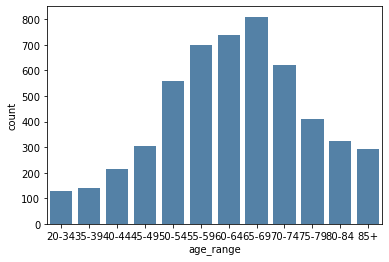

In [35]:
sns.countplot(data = df, x = 'age_range', color = 'SteelBlue')

In [36]:
bins = [0, 1, 7, 12, 17, 22, 30, 60, 90, 1000]
names = ['0', '1-7', '8-12', '13-17', '18-22', '23-30', '31-60','61-90', '91+']

df['tum_afm_range'] = pd.cut(df['tum_afm'], bins, labels=names)

<AxesSubplot:xlabel='tum_afm_range', ylabel='count'>

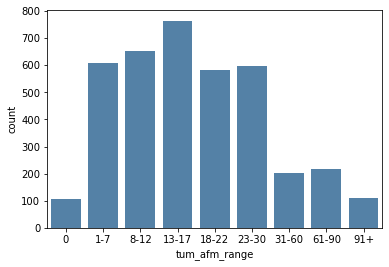

In [37]:
sns.countplot(data = df, x = 'tum_afm_range', color = 'SteelBlue')

In [38]:
df.head()

,leeft,vit_stat,vit_stat_int,tumsoort,diag_basis,topo_sublok,later,morf,gedrag,diffgrad,...,rt,meta_rt,meta_chir,survival_5Y,years_after_diagnosis,stadiumtot,pos_lymf_range,pos_lymf_ind,age_range,tum_afm_range
1,60,0,3592,503200,2,C505,1.0,8520,2,2,...,2.0,0.0,0.0,1,NaN,2,Negative,0,60-64,18-22
2,43,0,4011,502200,7,C508,2.0,8500,2,1,...,0.0,0.0,0.0,1,NaN,0,Negative,0,40-44,18-22
8,61,0,4004,501300,7,C504,1.0,8500,3,9,...,2.0,0.0,0.0,1,NaN,2,Negative,0,60-64,NaN
14,76,1,1466,501300,2,C504,2.0,8500,3,2,...,0.0,0.0,0.0,0,4.0,3,Negative,0,75-79,NaN
20,60,1,2865,501300,7,C502,1.0,8500,3,2,...,2.0,0.0,0.0,1,NaN,2,1-3 Positive,1,60-64,18-22


<a id='expl'></a>
### Data exploration

<a id='age'></a>
#### Age, vital status and time since incident

Let's visualize data describing the vital status of the patients:
- age ('leeft')
- vital status ('vit_stat')
- time (in days) since the incidence until recording the status ('vit_stat_int')

<AxesSubplot:xlabel='vit_stat_int', ylabel='leeft'>

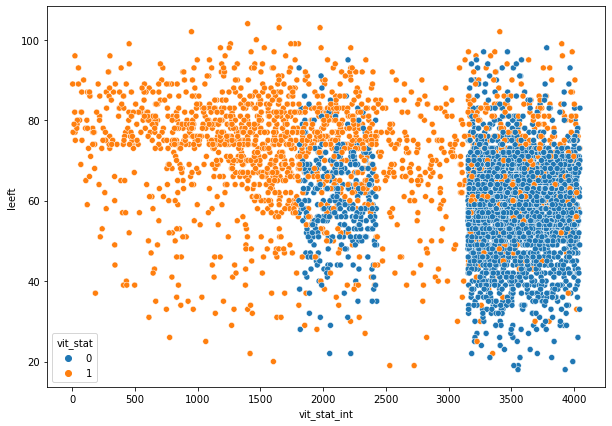

In [39]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = df, x = 'vit_stat_int', y = 'leeft', hue = 'vit_stat')

One can easily notice patterns:
- vital status 1 points (yellow) are distributed fairly randomly (although higher concentration of points above a line of leeft around 73)
- for vital status 0 (blue), values of vit_stat_int belong to one of two very clearly defined ranges. 

Questions arise how these patterns come about and whether they distort data analysis. This will be investigated in the following sections.

<a id='num'></a>
#### Numeric features

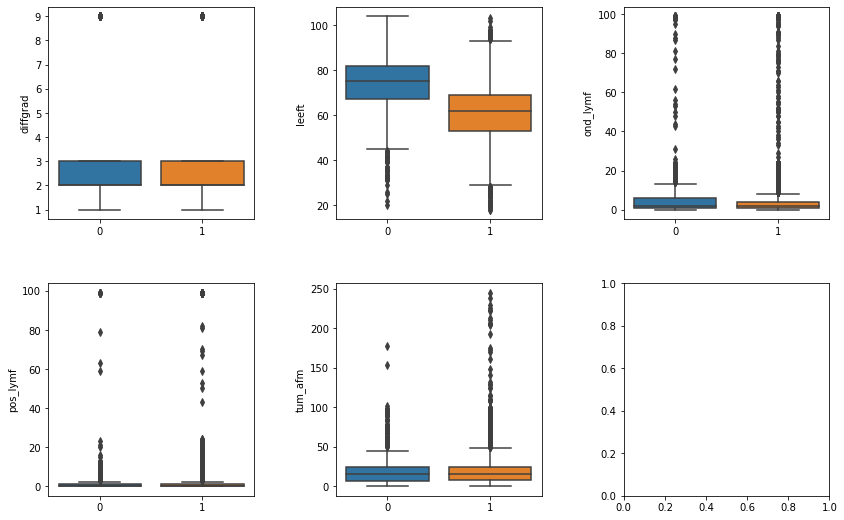

In [40]:
fig, ax = plt.subplots(2, 3, figsize=(14,9), gridspec_kw={'hspace': 0.3})
for i, col in enumerate(df[numeric_features].columns.difference(['survival_5Y'])):
    _ax=ax[i // 3, i % 3]
    sns.boxplot(y=col, x="survival_5Y", data=df, ax=_ax)
    _ax.set_xlabel(None)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

<AxesSubplot:xlabel='ond_lymf', ylabel='Count'>

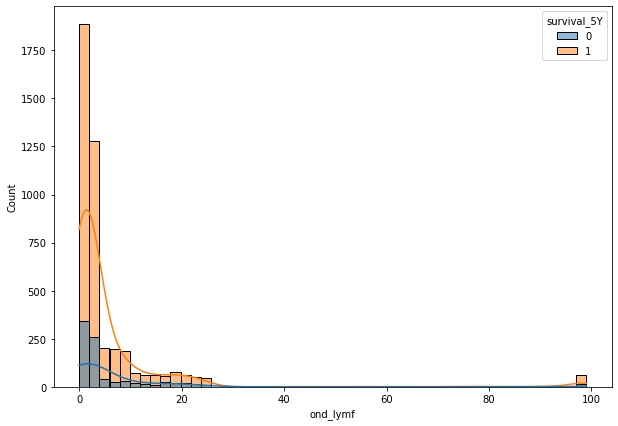

In [41]:
plt.figure(figsize = (10,7))
sns.histplot(data = df, x = 'ond_lymf', hue = 'survival_5Y', bins = 50, kde = True)

<AxesSubplot:xlabel='pos_lymf', ylabel='Count'>

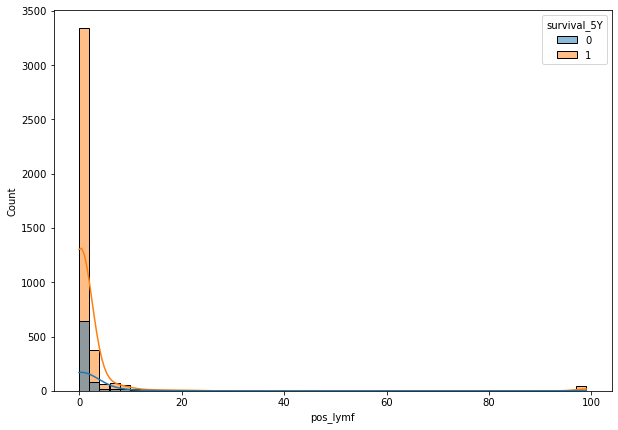

In [42]:
plt.figure(figsize = (10,7))
sns.histplot(data = df, x = 'pos_lymf', hue = 'survival_5Y', bins = 50, kde = True)

In [43]:
dftemp = pd.concat([df[numeric_features], df['survival_5Y']], axis = 1) # select numeric features to show on pairplot

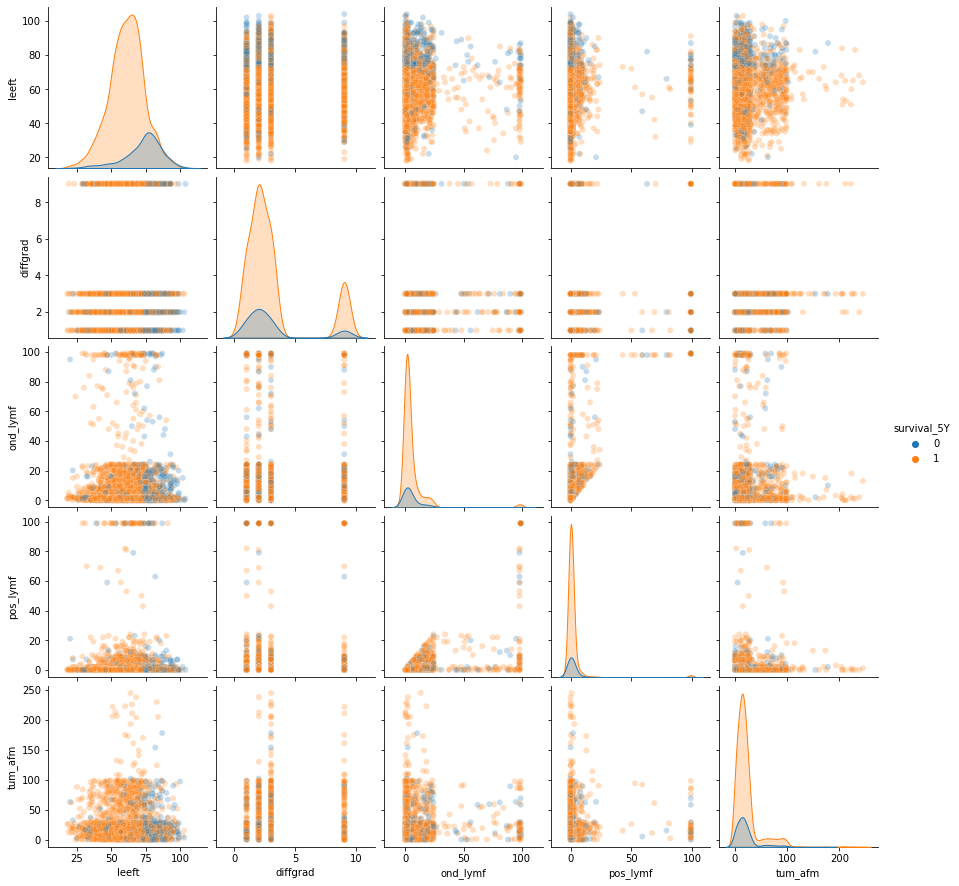

In [44]:
sns.pairplot(data = dftemp, hue = 'survival_5Y', plot_kws={'alpha':0.25})

<a id='cat'></a>
#### Categorical features

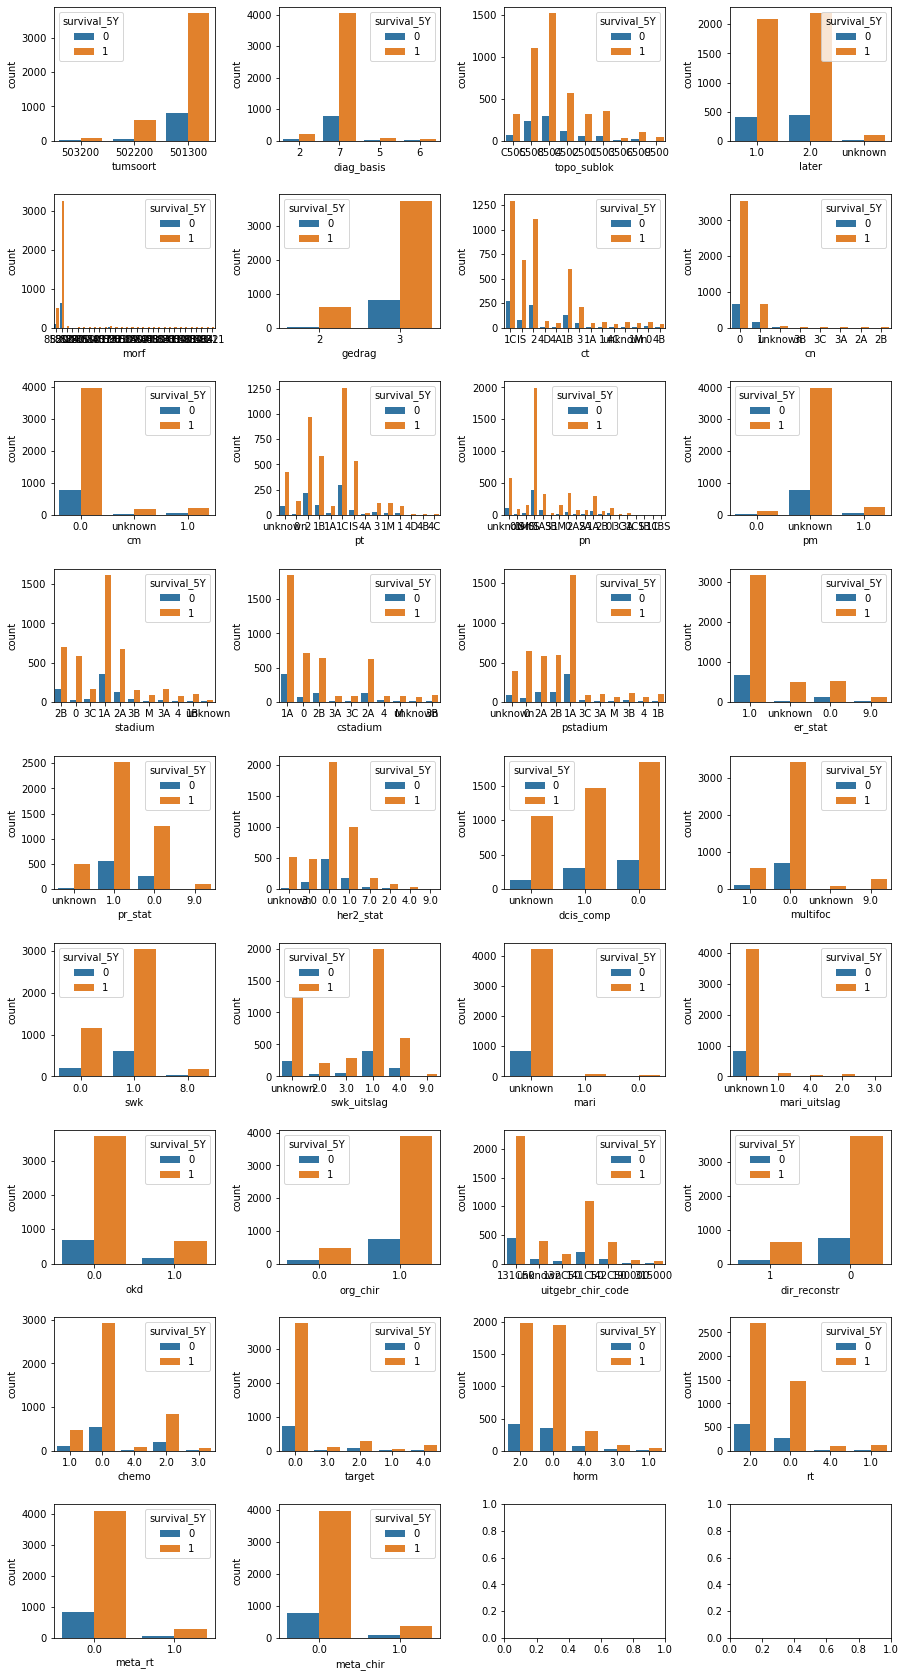

In [45]:
fig, ax = plt.subplots(9, 4, figsize=(15,30))
for i, col in enumerate(categorical_features):
    _ax=ax[i // 4, i % 4]
    sns.countplot(x=col, hue="survival_5Y", data=df, ax=_ax)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

We shall check for correlations between individual categorical features and the 5Y survival rate. Note the limits of y axis, 0.7 to 1.0, which on purpose make differences appear bigger.

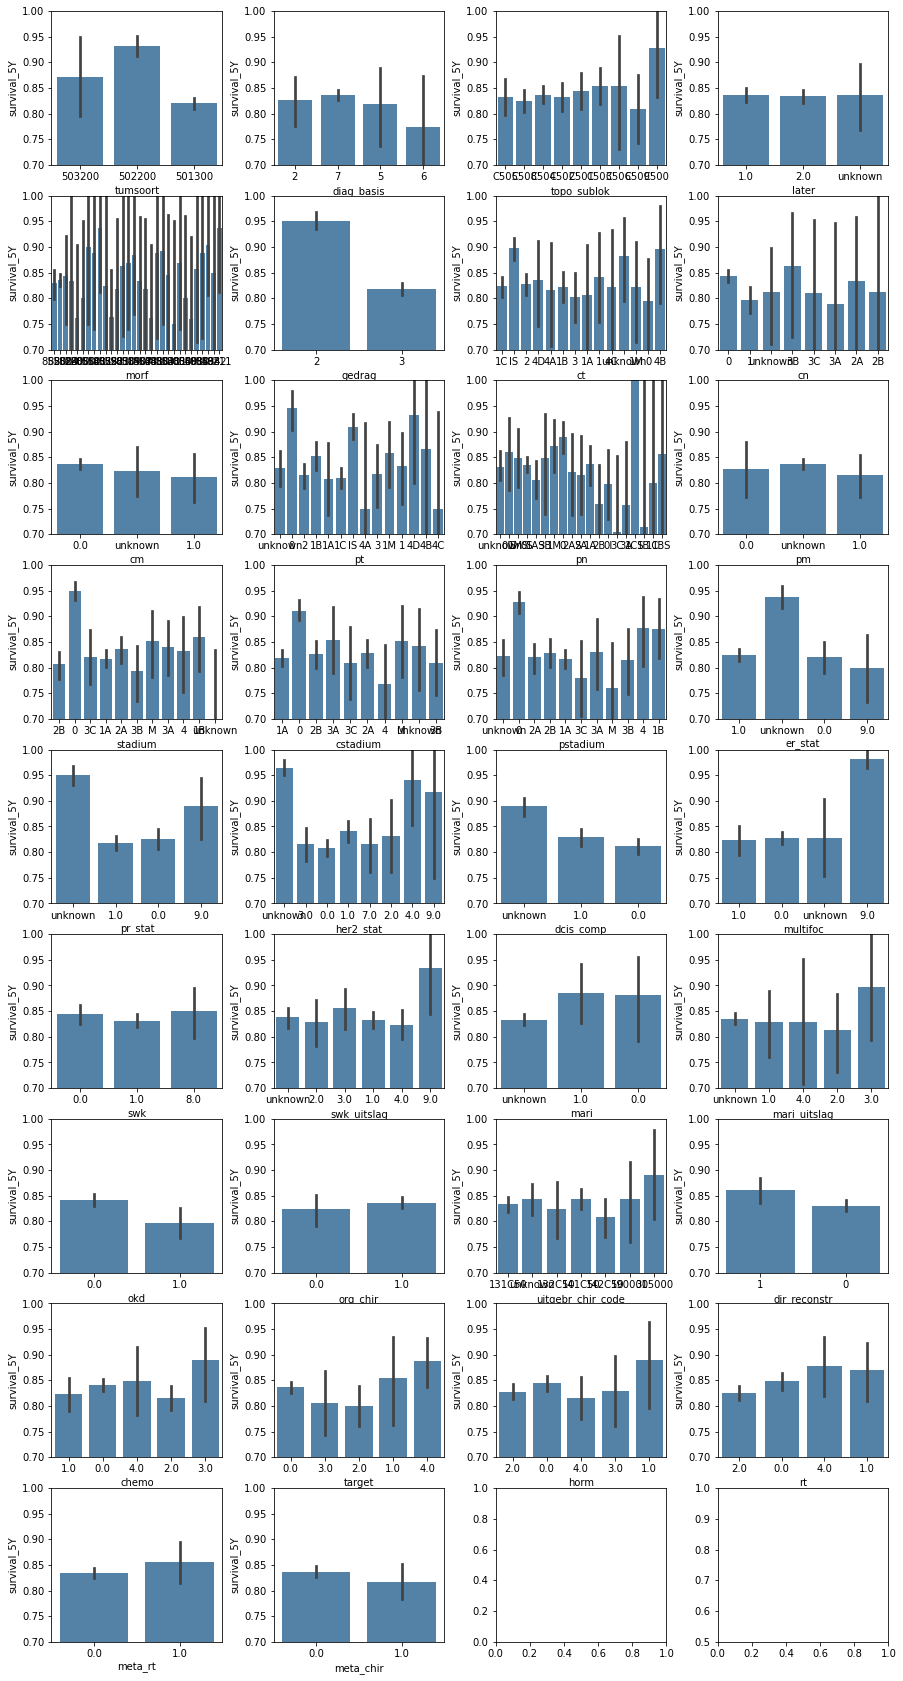

In [46]:
fig, ax = plt.subplots(9, 4, figsize=(15,30))
for i, col in enumerate(categorical_features):
    _ax=ax[i // 4, i % 4]
    _ax.set_ylim(0.7, 1)
    sns.barplot(x=col, y="survival_5Y", data=df, ax=_ax, color = 'SteelBlue')
plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.ylim(0.5, 1)
plt.show()

<a id='other'></a>
#### Other correlations

In [47]:
df_stadium = df.groupby('stadiumtot').mean()
df_stadium

,leeft,vit_stat,vit_stat_int,diffgrad,ond_lymf,pos_lymf,tum_afm,survival_5Y,years_after_diagnosis,pos_lymf_ind
stadiumtot,,,,,,,,,,
0,60.621753,0.146104,3259.946429,3.503247,4.240589,1.925926,23.650289,0.949675,4.057971,0.334416
1,63.188661,0.372082,2885.704621,2.843735,4.426041,1.919811,15.507589,0.819914,3.447368,0.336827
2,63.445562,0.362722,2891.563314,3.066864,7.037455,2.431385,25.240912,0.820118,3.248292,0.390533
3,63.732787,0.404918,2901.400000,3.531148,8.361842,2.357143,30.056235,0.818033,3.522013,0.421311
4,61.775281,0.415730,2834.337079,3.584270,19.966292,5.690476,25.644068,0.831461,3.208333,0.539326
M,63.891089,0.366337,2971.811881,3.524752,13.320000,4.670213,23.145161,0.851485,3.666667,0.415842
Unknown,65.333333,0.583333,2570.666667,4.777778,12.833333,5.514286,23.882353,0.694444,3.071429,0.388889


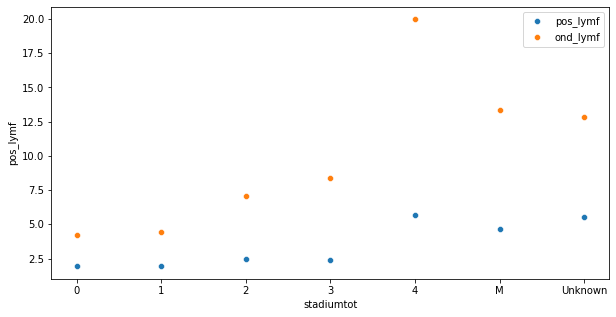

In [48]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = df_stadium, x = df_stadium.index, y = df_stadium['pos_lymf'], label = 'pos_lymf')
sns.scatterplot(data = df_stadium, x = df_stadium.index, y = df_stadium['ond_lymf'], label = 'ond_lymf')
plt.legend()

In [49]:
df_dead = df[df['vit_stat'] == 1]

<AxesSubplot:xlabel='leeft', ylabel='vit_stat_int'>

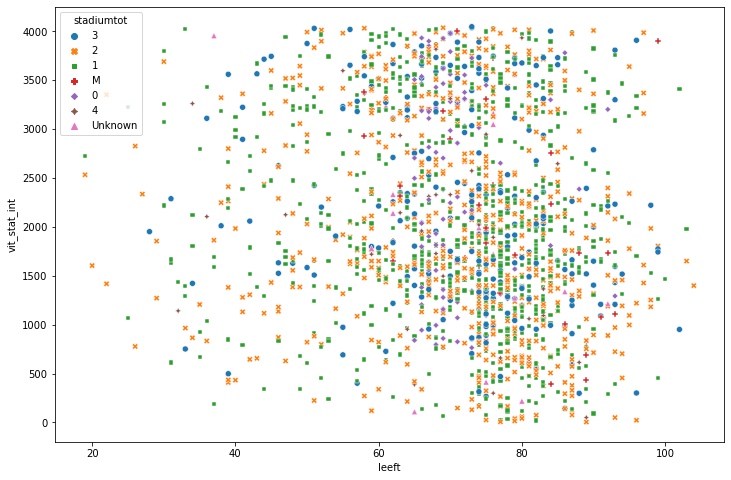

In [50]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = df_dead, x = 'leeft', y = 'vit_stat_int', style = 'stadiumtot', hue = 'stadiumtot')

In [51]:
df.to_csv('Breast_cancer_transformed.csv', encoding='utf-8', index=False)